In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [2]:
df_India = df[df.job_country == 'India'].copy()
df_India['job_posted_month'] = df_India['job_posted_date'].dt.strftime('%B')
df_India_pivot = df_India.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_India_pivot.reset_index(inplace=True)
df_India_pivot['month_no' ] = pd.to_datetime(df_India_pivot ['job_posted_month' ], format='%B' ) . dt. month
df_India_pivot.sort_values('month_no',inplace=True)
df_India_pivot.set_index('job_posted_month',inplace=True)
df_India_pivot.drop(columns='month_no',inplace=True)
df_India_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [13]:
import pandas as pd

data = {
    "job_posted_month": [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ],
    "Front-End Developer": [13619, 11456, 11102, 14037, 12126, 12003, 11914, 11571, 14016, 11419, 13771, 13721],
    "Back-End Developer": [9827, 9116, 8178, 9209, 8864, 8065, 8061, 8191, 8447, 8476, 9034, 9101],
    "Full-Stack Developer": [5108, 7298, 5814, 7232, 6718, 5902, 6839, 7413, 6139, 5026, 5653, 6731],
    "UI/UX Designer": [4348, 4284, 4159, 4220, 4980, 4781, 4344, 4104, 4094, 4389, 4099, 4367],
}

df_software = pd.DataFrame(data)
df_software.to_csv("software_jobs.csv", index=False)

read and set the job_posted_month as the index

In [26]:
df_sofware_jobs_pivot = pd.read_csv("software_jobs.csv", index_col='job_posted_month')
df_sofware_jobs_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


merging dataframes (options are on,how in which we can use left,inner,right and outer join)

In [33]:
df_merged_data = df_India_pivot.merge(df_sofware_jobs_pivot, on="job_posted_month")

In [ ]:
top_5 = (
    df_merged_data
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.to_list()
)
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

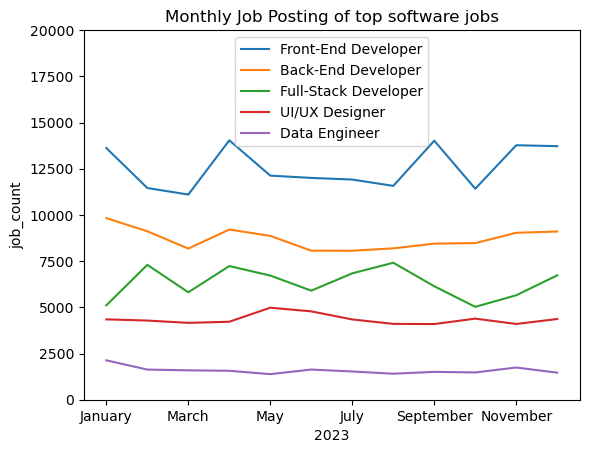

In [51]:
df_merged_data[top_5].plot(kind='line')
plt.title('Monthly Job Posting of top software jobs')
plt.xlabel('2023')
plt.ylabel('job_count')
plt.ylim(0,20000)
plt.legend()
plt.show()